In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [46]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [49]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [50]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
maxdate = session.query(func.max(measurement.date)).all()
maxdate

[('2017-08-23',)]

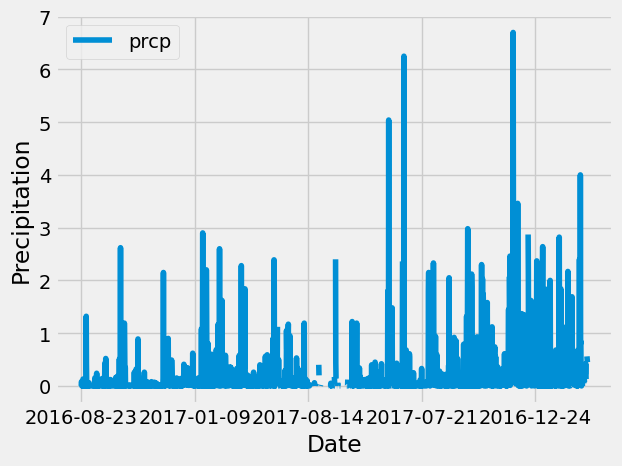

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precipdates = session.query(measurement.station,measurement.date,measurement.prcp,measurement.tobs).filter(func.strftime(measurement.date) >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipdates, columns=['station','date','prcp','tobs'])

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
# The TA walked me through the code below:
df.plot(x='date',y='prcp')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp,tobs
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.name)).all()

[(9,)]

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#The TA walked me step by step through writing this code:
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [63]:
tobs = session.query(measurement.tobs).filter(measurement.date>=query_date).all()
tobs

[(81.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (80.0,),
 (81.0,),
 (80.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (81.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (82.0,),
 (81.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (75.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (80.0,),
 (81.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (76.0,),
 (75.0,),
 (68.0,),
 (75.0,),


In [66]:
df = pd.DataFrame(tobs, columns=['tobs'])
df

,tobs
0,81.0
1,79.0
2,80.0
3,79.0
4,77.0
...,...
2225,71.0
2226,78.0
2227,76.0
2228,76.0


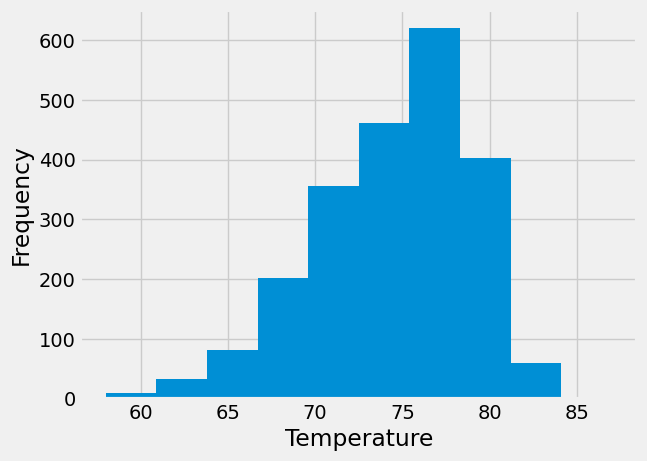

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(df)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
# print(st.normaltest(temperatures.sample(50)))

# Close Session

In [68]:
# Close Session
session.close()